In [1]:
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Flatten, concatenate 
from keras.layers.convolutional import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from keras.utils import np_utils, plot_model
from keras.callbacks import EarlyStopping
from keras import backend as K
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
import numpy as np
import os
os.environ['PATH']+=os.pathsep+'C:\\Program Files (x86)\\Graphviz2.38\\bin'

c:\users\nildip.mukherjee\appdata\local\continuum\anaconda3\envs\python_36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def simple_nn(n_class, n_col):
    # input shape
    input_shape = Input(shape = (n_col))
    # fully connected hidden layers
    fc_layer = Dense(500, activation = 'relu')(input_shape)
    fc_layer = Dropout(0.5)(fc_layer)
    fc_layer = Dense(100, activation = 'relu')(fc_layer)
    fc_layer = Dropout(0.4)(fc_layer)
    fc_layer = Dense(25, activation = 'relu')(fc_layer)
    fc_layer = Dropout(0.3)(fc_layer)
    # output layer
    if n_class > 2:
        out = Dense(n_class, activation = 'softmax')(fc_layer)
    else:
        out = Dense(n_class, activation = 'sigmoid')(fc_layer)
    model = Model(input_shape, out)
    return model

In [3]:
def simple_2Dcnn(n_class, image_height, image_width):
    # input shape
    input_shape = Input(shape=(image_height, image_width, 1))
    # cnn layer
    cnn_layer = Conv2D(nb_filter = 10, kernel_size = 15, strides = 1, activation = 'relu')(input_shape)
    cnn_layer = Dropout(0.5)(cnn_layer)
    cnn_layer = (MaxPooling2D(pool_size = 2))(cnn_layer)
    # reshaping for fully connected layers
    cnn_flat = Flatten()(cnn_layer)
    # fully connected hidden layers
    fc_layer = Dense(500, activation = 'relu')(cnn_flat)
    fc_layer = Dropout(0.5)(fc_layer)
    fc_layer = Dense(100, activation = 'relu')(fc_layer)
    fc_layer = Dropout(0.4)(fc_layer)
    # output layer
    if n_class > 2:
        out = Dense(n_class, activation = 'softmax')(fc_layer)
    else:
        out = Dense(n_class, activation = 'sigmoid')(fc_layer)
    model = Model(input_shape, out)
    return model

In [4]:
def simple_1Dcnn(n_class, n_col):
    # input shape
    input_shape = Input(shape=(n_col,1))
    # 1D cnn layer
    cnn_layer = Conv1D(nb_filter = 10, kernel_size = 15, strides = 1, activation = 'relu')(input_shape)
    cnn_layer = Dropout(0.5)(cnn_layer)
    cnn_layer = (MaxPooling1D(pool_size = 2))(cnn_layer)
    # reshaping for fully connected layers
    cnn_flat = Flatten()(cnn_layer)
    # fully connected hidden layers
    fc_layer = Dense(500, activation = 'relu')(cnn_flat)
    fc_layer = Dropout(0.5)(fc_layer)
    fc_layer = Dense(100, activation = 'relu')(fc_layer)
    fc_layer = Dropout(0.4)(fc_layer)
    # output layer
    if n_class > 2:
        out = Dense(n_class, activation = 'softmax')(fc_layer)
    else:
        out = Dense(n_class, activation = 'sigmoid')(fc_layer)
    model = Model(input_shape, out)
    return model

In [5]:
def stacked_2Dcnn(n_class, image_height, image_width):
    # input shape
    input_shape = Input(shape=(image_height, image_width, 1))
    # cnn layers
    cnn_layer = Conv2D(nb_filter = 10, kernel_size = 15, strides = 1, activation = 'relu')(input_shape)
    cnn_layer = Dropout(0.5)(cnn_layer)
    cnn_layer = (MaxPooling2D(pool_size = 2))(cnn_layer)
    cnn_layer = Conv2D(nb_filter = 7, kernel_size = 10, strides = 1, activation = 'relu')(input_shape)
    cnn_layer = Dropout(0.4)(cnn_layer)
    cnn_layer = (MaxPooling2D(pool_size = 2))(cnn_layer)
    cnn_layer = Conv2D(nb_filter = 5, kernel_size = 5, strides = 1, activation = 'relu')(input_shape)
    cnn_layer = Dropout(0.3)(cnn_layer)
    cnn_layer = (MaxPooling2D(pool_size = 2))(cnn_layer)
    # reshaping for fully connected layers
    cnn_flat = Flatten()(cnn_layer)
    # fully connected hidden layers
    fc_layer = Dense(500, activation = 'relu')(cnn_flat)
    fc_layer = Dropout(0.5)(fc_layer)
    fc_layer = Dense(100, activation = 'relu')(fc_layer)
    fc_layer = Dropout(0.4)(fc_layer)
    # output layer
    if n_class > 2:
        out = Dense(n_class, activation = 'softmax')(fc_layer)
    else:
        out = Dense(n_class, activation = 'sigmoid')(fc_layer)
    model = Model(input_shape, out)
    return model

In [6]:
def stacked_1Dcnn(n_class, n_col):
    # input shape
    input_shape = Input(shape=(n_col,1))
    # 1D cnn layer
    cnn_layer = Conv1D(nb_filter = 10, kernel_size = 15, strides = 1, activation = 'relu')(input_shape)
    cnn_layer = Dropout(0.5)(cnn_layer)
    cnn_layer = (MaxPooling1D(pool_size = 2))(cnn_layer)
    cnn_layer = Conv1D(nb_filter = 7, kernel_size = 10, strides = 1, activation = 'relu')(input_shape)
    cnn_layer = Dropout(0.4)(cnn_layer)
    cnn_layer = (MaxPooling1D(pool_size = 2))(cnn_layer)
    cnn_layer = Conv1D(nb_filter = 5, kernel_size = 5, strides = 1, activation = 'relu')(input_shape)
    cnn_layer = Dropout(0.3)(cnn_layer)
    cnn_layer = (MaxPooling1D(pool_size = 2))(cnn_layer)
    # reshaping for fully connected layers
    cnn_flat = Flatten()(cnn_layer)
    # fully connected hidden layers
    fc_layer = Dense(500, activation = 'relu')(cnn_flat)
    fc_layer = Dropout(0.5)(fc_layer)
    fc_layer = Dense(100, activation = 'relu')(fc_layer)
    fc_layer = Dropout(0.4)(fc_layer)
    # output layer
    if n_class > 2:
        out = Dense(n_class, activation = 'softmax')(fc_layer)
    else:
        out = Dense(n_class, activation = 'sigmoid')(fc_layer)
    model = Model(input_shape, out)
    return model

In [7]:
def multitower_2Dcnn(n_class, image_height, image_width):
    # input shape
    input_shape = Input(shape=(image_height, image_width, 1))
    # cnn-tower 1
    tower1 = Conv2D(nb_filter = 4, kernel_size = 15, strides = 1, activation = 'relu')(input_shape)
    tower1 = Dropout(0.5)(tower1)
    tower1 = Flatten()(tower1)
    # cnn-tower 2
    tower2 = Conv2D(nb_filter = 4, kernel_size = 15, strides = 1, activation = 'relu')(input_shape)
    tower2 = Dropout(0.5)(tower2)
    tower2 = Flatten()(tower2)
    # cnn-tower 3
    tower3 = Conv2D(nb_filter = 4, kernel_size = 15, strides = 1, activation = 'relu')(input_shape)
    tower3 = Dropout(0.5)(tower3)
    tower3 = Flatten()(tower3)
    # reshaping for fully connected layers
    cnn_flat = concatenate([tower1, tower2, tower3], axis=1)
    # fully connected hidden layers
    fc_layer = Dense(500, activation = 'relu')(cnn_flat)
    fc_layer = Dropout(0.5)(fc_layer)
    fc_layer = Dense(100, activation = 'relu')(fc_layer)
    fc_layer = Dropout(0.4)(fc_layer)
    # output layer
    if n_class > 2:
        out = Dense(n_class, activation = 'softmax')(fc_layer)
    else:
        out = Dense(n_class, activation = 'sigmoid')(fc_layer)
    model = Model(input_shape, out)
    return model

c:\users\nildip.mukherjee\appdata\local\continuum\anaconda3\envs\python_36\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  app.launch_new_instance()
c:\users\nildip.mukherjee\appdata\local\continuum\anaconda3\envs\python_36\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.


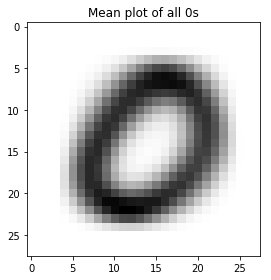

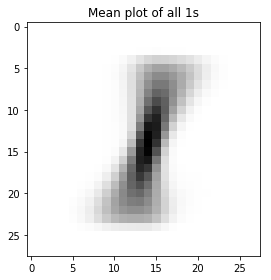

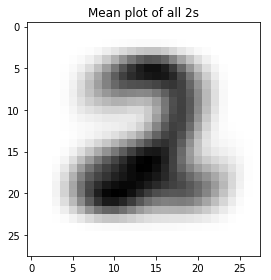

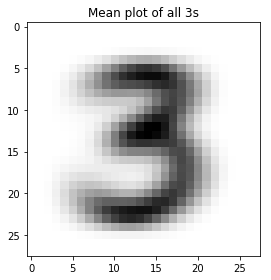

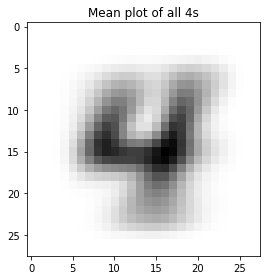

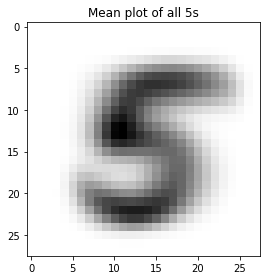

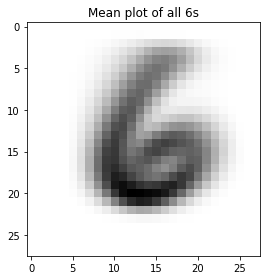

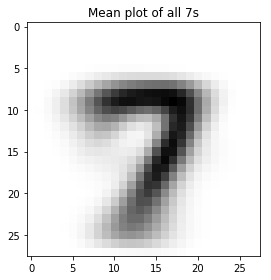

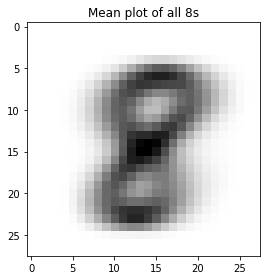

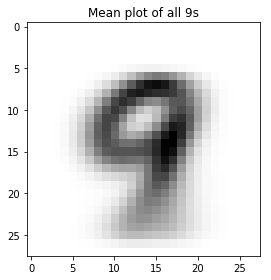

In [8]:
# loading the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# normalizing the values
X_train = X_train / 255
X_test = X_test / 255

# plotting the average image for each number
for i in range(0,10):
    plt.figure()
    plt.title('Mean plot of all {0}s'.format(i))
    plt.tight_layout()
    plt.imshow(np.mean(X_train[np.where(y_train == i)], axis=0), cmap = plt.get_cmap('gray_r'))

# reshaping data for 2D CNN
X_train_2D = np.expand_dims(X_train, axis=4)
X_test_2D = np.expand_dims(X_test, axis=4)

# reshaping data for 1D CNN
X_train_1D = np.expand_dims(X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]).astype('float32'), axis = 2)
X_test_1D = np.expand_dims(X_test.reshape(X_test.shape[0], X_train.shape[1]*X_train.shape[2]).astype('float32'), axis = 2)

# reshaping data for basic NN
X_train_nn = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]).astype('float32')
X_test_nn = X_test.reshape(X_test.shape[0], X_train.shape[1]*X_train.shape[2]).astype('float32')

# one hot encode output
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

In [9]:
model = stacked_2Dcnn(10,28,28)
#model = stacked_1Dcnn(10,784)
model.summary()
# print model structure to png file
plot_model(model, to_file='model.png', show_shapes = True)
# complile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# Fit the model
early_stopping = EarlyStopping(monitor = 'val_loss', patience=2)
model.fit(X_train_2D, Y_train, validation_data = (X_test_2D, Y_test), epochs=20, batch_size=200, callbacks=[early_stopping])
# Final evaluation of the model
scores = model.evaluate(X_test_2D, Y_test, verbose=0)
print("Model Error: %.2f%%" % (100-scores[1]*100))

c:\users\nildip.mukherjee\appdata\local\continuum\anaconda3\envs\python_36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(kernel_size=15, strides=1, activation="relu", filters=10)`
  """
c:\users\nildip.mukherjee\appdata\local\continuum\anaconda3\envs\python_36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(kernel_size=10, strides=1, activation="relu", filters=7)`
  
c:\users\nildip.mukherjee\appdata\local\continuum\anaconda3\envs\python_36\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(kernel_size=5, strides=1, activation="relu", filters=5)`
  # This is added back by InteractiveShellApp.init_path()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 5)         130       
_________________________________________________________________
dropout_3 (Dropout)          (None, 24, 24, 5)         0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 5)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 720)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               360500    
_________________________________________________________________
dropout_4 (Dropout)          (None, 500)               0         
__________

In [10]:
Y_pred = model.predict(X_test_2D)
Y_pred = Y_pred.argmax(axis= 1)

In [11]:
def plot_confusion_matrix(Y_true, Y_predicted, classes, normalize=False):
    cm = confusion_matrix(Y_true, Y_predicted, labels = classes)
    plt.figure()
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.get_cmap('gray_r'))
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],  horizontalalignment = "center", color = "white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

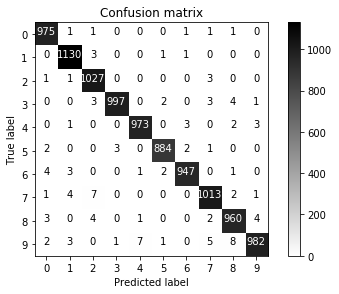

In [12]:
# plotting the confusion matrix
plot_confusion_matrix(y_test, Y_pred, classes=[0,1,2,3,4,5,6,7,8,9])

In [35]:
# with a Sequential model
get_3rd_layer_output = K.function([model.layers[0].input], [model.layers[1].output])

c:\users\nildip.mukherjee\appdata\local\continuum\anaconda3\envs\python_36\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  after removing the cwd from sys.path.


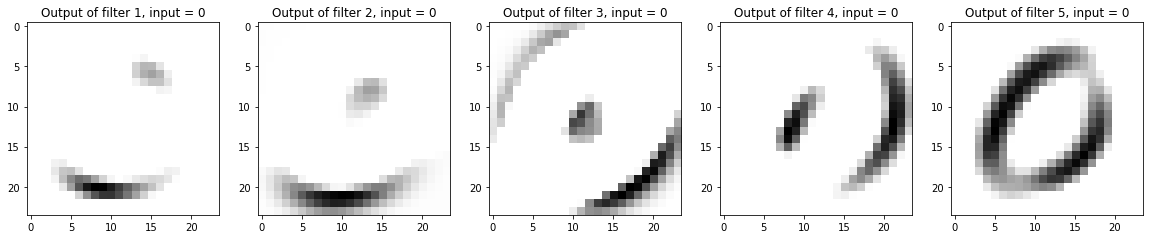

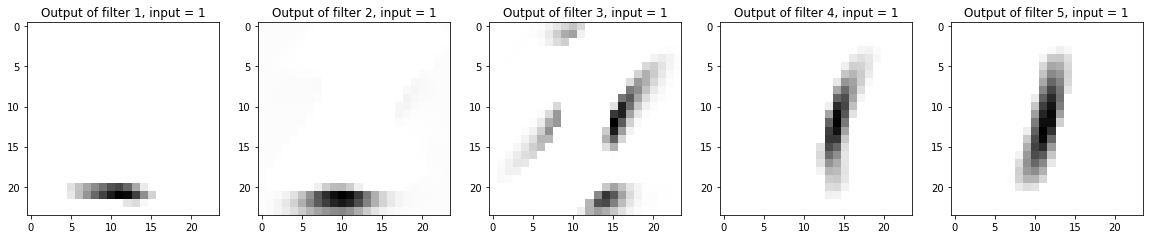

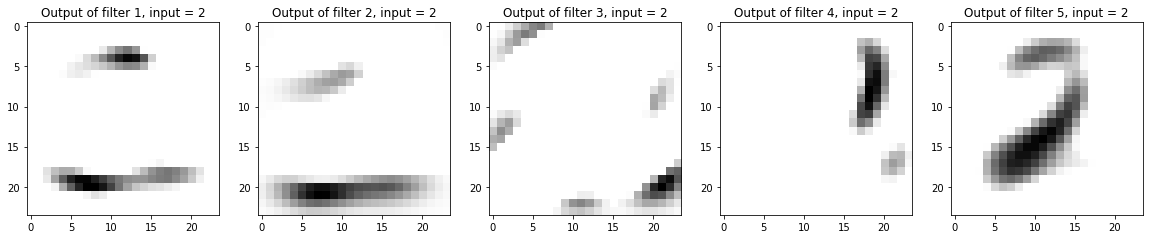

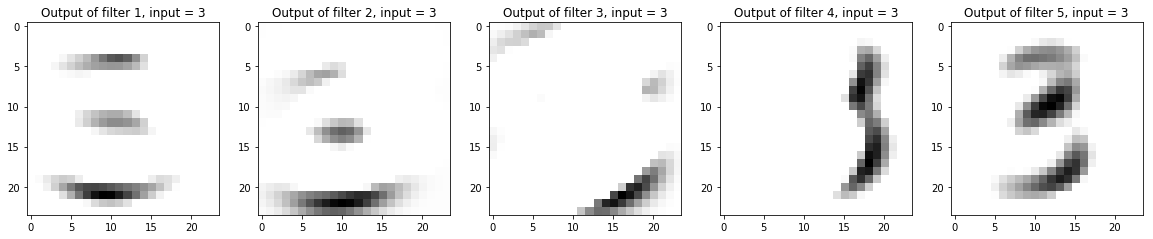

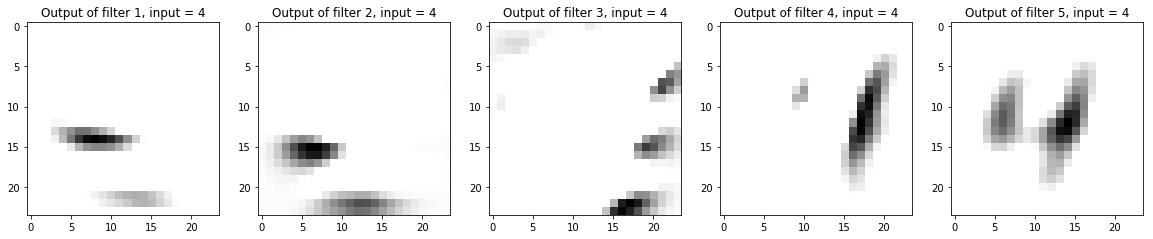

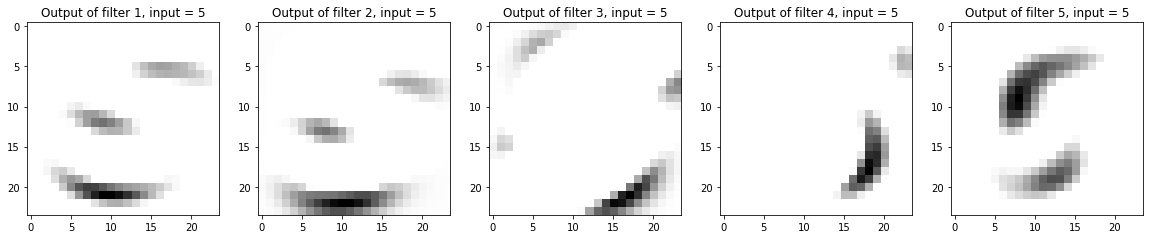

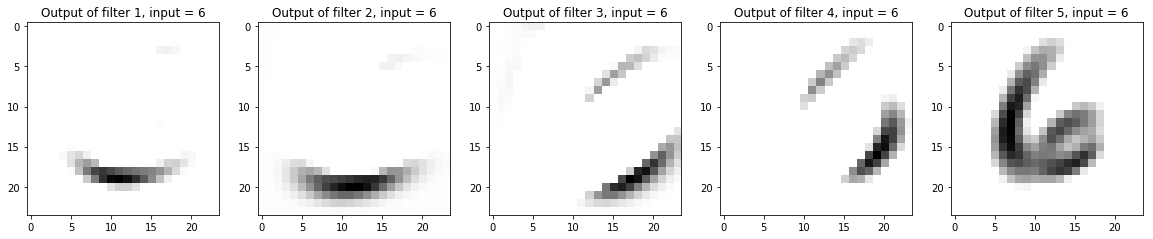

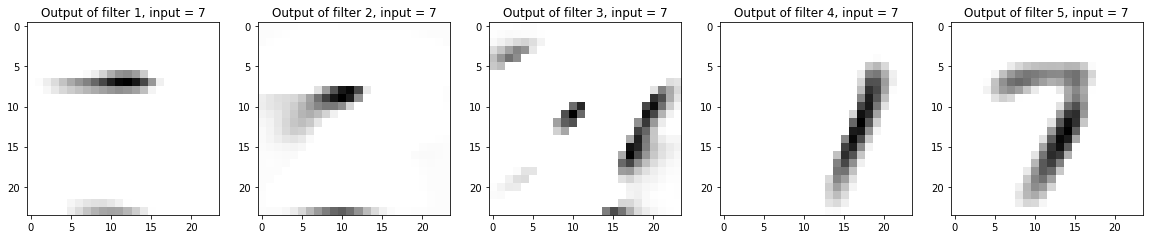

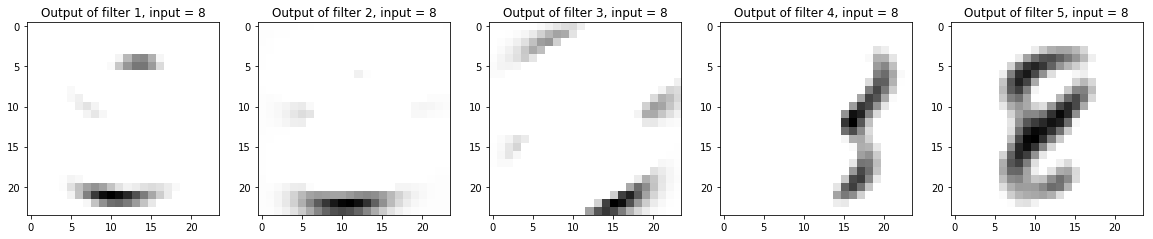

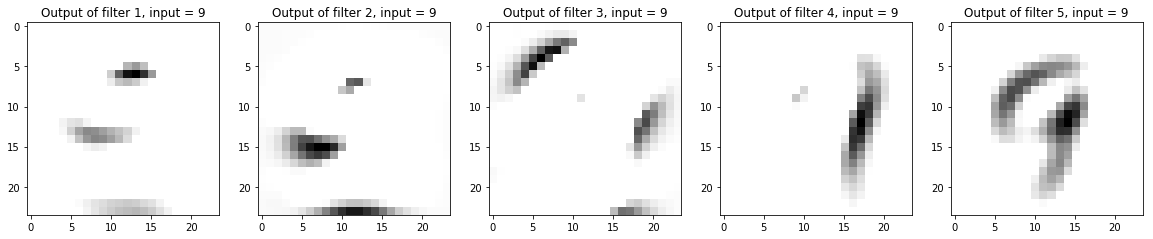

In [36]:
for k in range(0,10):
    X_layer = np.mean(X_test[np.where(y_test == k)], axis=0)
    X_layer = np.expand_dims(X_layer, axis=0)
    X_layer = np.expand_dims(X_layer, axis=4)
    layer_output = get_3rd_layer_output([X_layer])[0]
    plt.figure(figsize=(20,20))
    for i in range(0,5):
        plt.subplot(1, 5, i+1)
        plt.title('Output of filter {0}, input = {1}'.format(i+1, k))
        plt.imshow(layer_output[0][:,:,i], cmap = plt.get_cmap('gray_r'))